Kita akan melakukan klasifikasi _"Heart Disease Prediction"_ menggunakan beberap model Machine Learning sederhana. Pertama, kita akan siapin file datasetnya dulu nih guys!

Source data: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

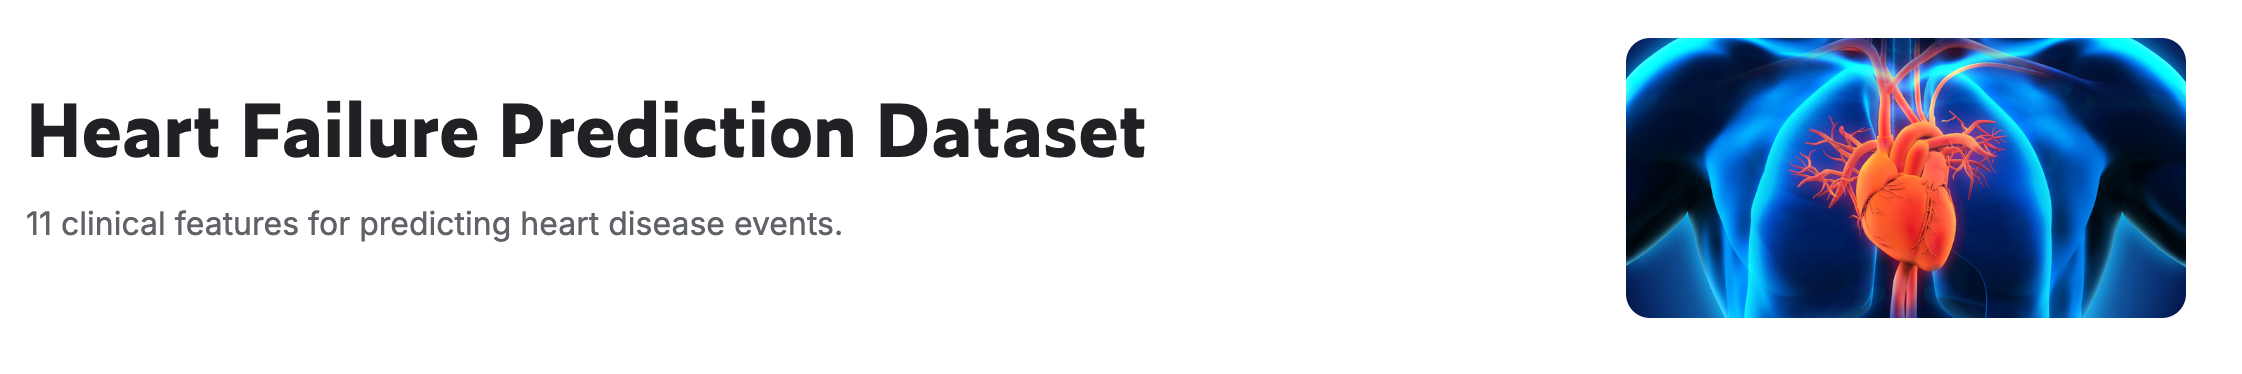

# Data Preparation

Pertama, kita download dataset nya dulu ya guys.
1. Download [file ini](https://drive.google.com/file/d/1y-0oWkmhOS9qcs8wuq6NgrlEADrEgfEH/view?usp=sharing)
2. Trus upload ke google colab ini.

### Load Data

Untuk meng-ekstrak file zip, kita akan menggunakan `ZipFile()` dari module zipfile. Kita akan menyerahkan nama file, dan mode sebagai argumen.

<font size=5><center>ZipFile(<font color=darkgrey>nama file</font>, <font color=darkgrey>mode</font>)</center></font>

mode untuk membuka file adalah:
- 'r' = read
- 'w' = write
- 'x' = execute


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate


In [2]:
# TODO: Load data
data = pd.read_csv("heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# TODO: Explore sikit dulu ngak sih
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Ketika file *csv* di-load dengan Pandas, file tersebut di-*handle* sebagai <u>DataFrame</u>. Setiap kolom dalam DataFrame biasa disebut Series. Dengan memanggil atribut `columns`, kita bisa melihat daftar nama Series dari DataFrame itu.

In [6]:
object_cols = data.select_dtypes(exclude="number").columns
num_cols = data.select_dtypes(include="number").columns

In [7]:
data[object_cols].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Data Understanding

In [8]:
object_cols = data.select_dtypes(exclude="number").columns
num_cols = data.select_dtypes(include="number").columns

In [9]:
len(num_cols)

7

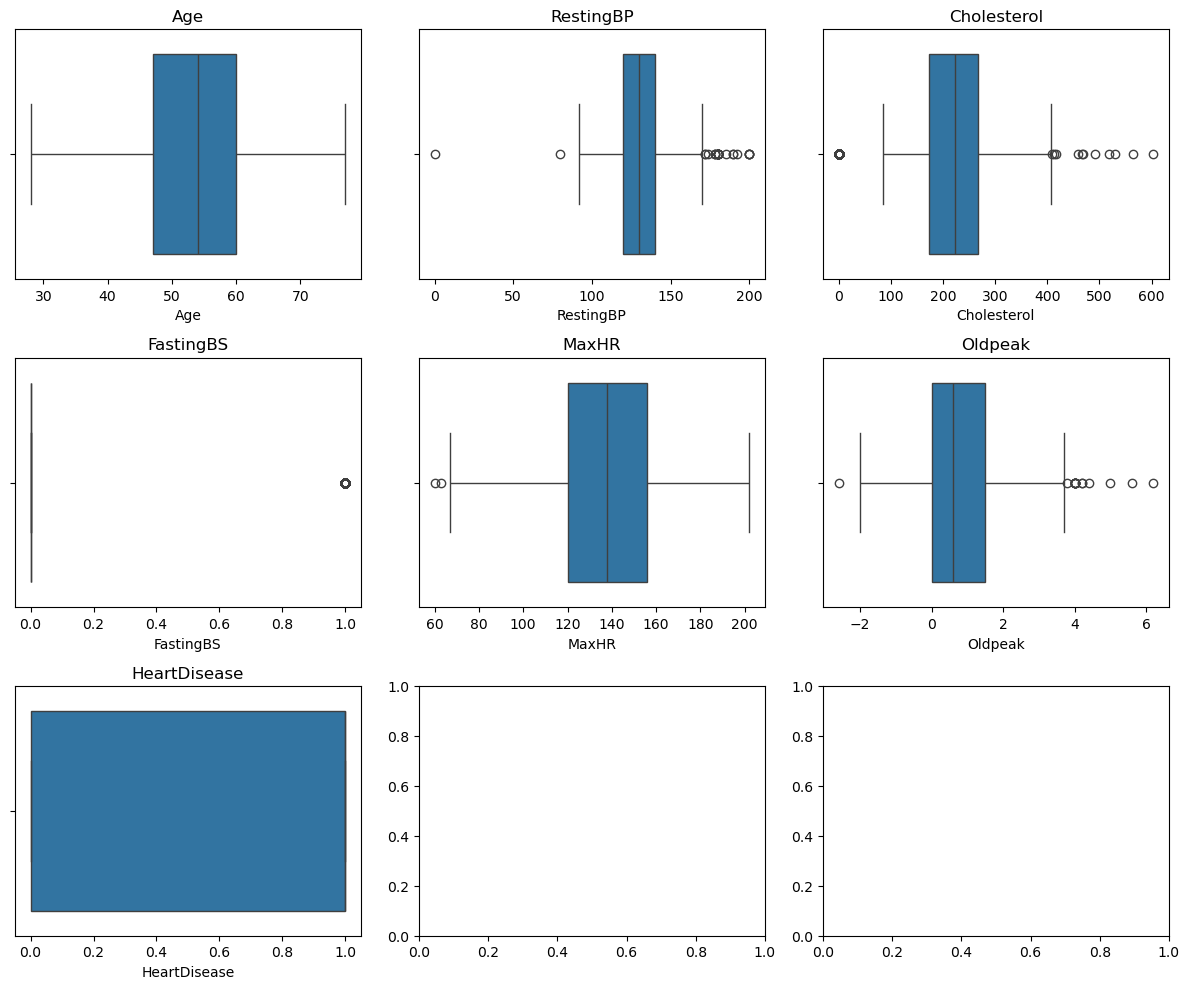

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=ax[idx])
    ax[idx].set_title(col)

plt.tight_layout()
plt.show()


no need to remove outlier since data have little of records

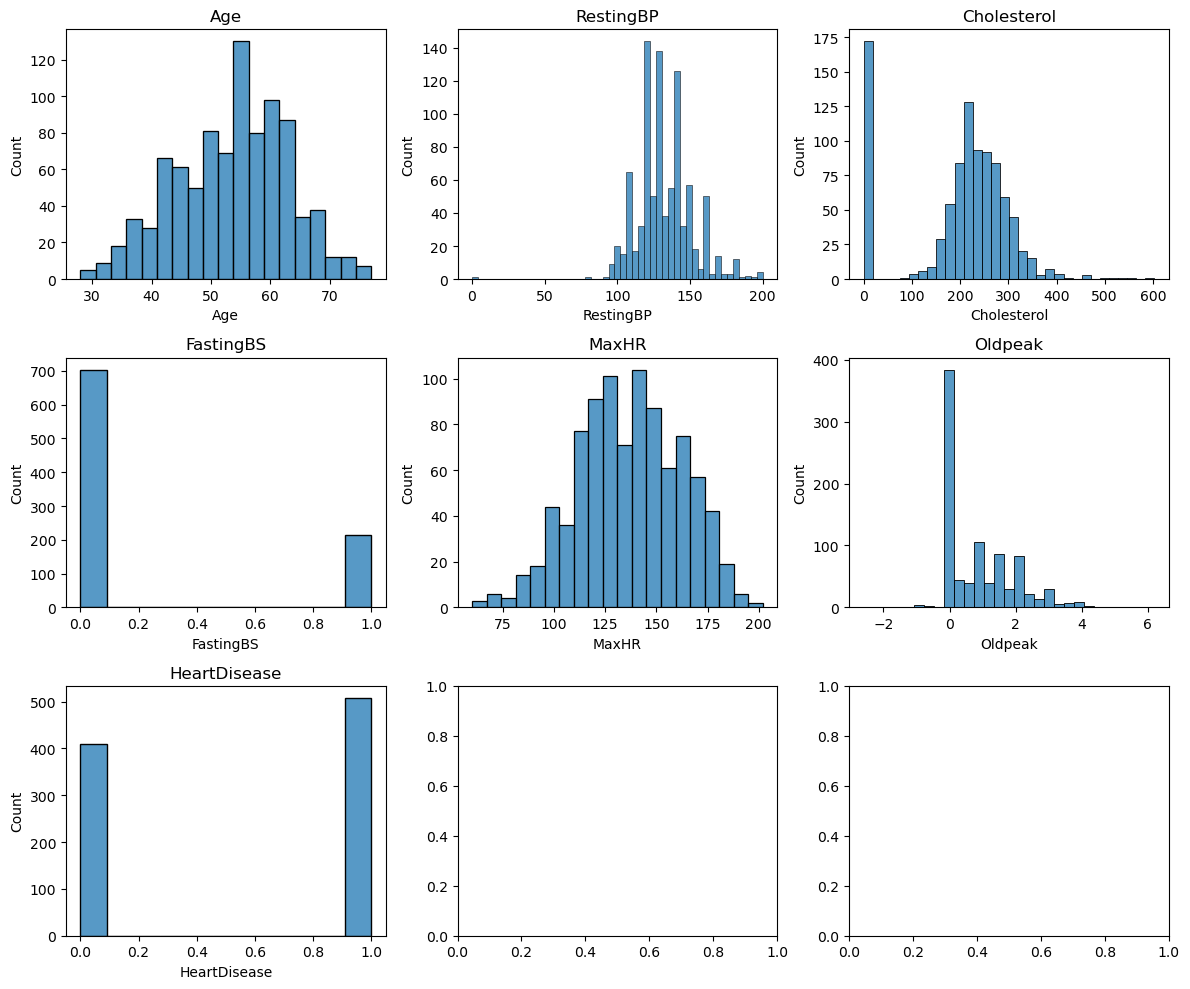

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(x=data[col], ax=ax[idx])
    ax[idx].set_title(col)

plt.tight_layout()
plt.show()

all the feature is somewhat to normal distribution

Untuk mendapatkan salah satu Series, kita bisa memanggil nama DataFrame dan menyerahkan nama Series yang diinginkan ke dalam kurung besar.

<font size=5><center>nama_DataFrame[<font color=darkgrey>nama series</font>]</center></font>

In [12]:
data["MaxHR"].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Bila ingin mendapat lebih dari 1 Series, kita bisa panggil DataFrame seperti berikut.


<font size=5><center>nama_DataFrame[[<font color=darkgrey>daftar nama series</font>]]</center></font>

In [13]:
data[["MaxHR", "Cholesterol"]].describe()

,MaxHR,Cholesterol
count,918.000000,918.000000
mean,136.809368,198.799564
std,25.460334,109.384145
min,60.000000,0.000000
25%,120.000000,173.250000
50%,138.000000,223.000000
75%,156.000000,267.000000
max,202.000000,603.000000


In [14]:
# TODO: Cek ada data yang ilang ngak & distribusi label
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(0)

#### Data Imbalance


In [16]:
data["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

the target is somewhat balance but not enough

Untuk mendapatkan fitur datanya, Series yang bukan termasuk fitur akan di-drop. kita akan memanggil fungsi `drop()` dan menyerahkan nama-nama Series non-fitur & aksis sebagai argumen.

<font size=5><center>drop([<font color=darkgrey>daftar nama series</font>], axis=<font color=darkgrey>aksis</font>)</center></font>

Untuk aksis, terdapat 2 pilihan (0 dan 1). Berikut adalah pilihan aksis:
- 0 : Baris (Horizontal)
- 1 : Kolom (Vertikal)

Karena kita akan men-drop kolom, kita akan gunakan aksis 1.

# Data Preprocessing

### Categorical Data

In [17]:
cat_cols = data.select_dtypes(exclude="number").columns
num_cols = data.select_dtypes(include="number").columns.drop("HeartDisease")

In [18]:
# TODO: Convert kolom-kolom categorical ke one-hot encoding, label encoding
for col in cat_cols:
  print(f"{col} : {data[col].unique()}")

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


In [19]:
#ohe
data = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)

### Numerical Data

In [20]:
# TODO: Kalo buat data numerik sih di rescale aja cukup
data[num_cols].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [21]:
sc = StandardScaler()
data[num_cols] = sc.fit_transform(data[num_cols])

In [22]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1


#### PCA (Dimensionally reduction)

In [23]:
# TODO: Pisah feature & label
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

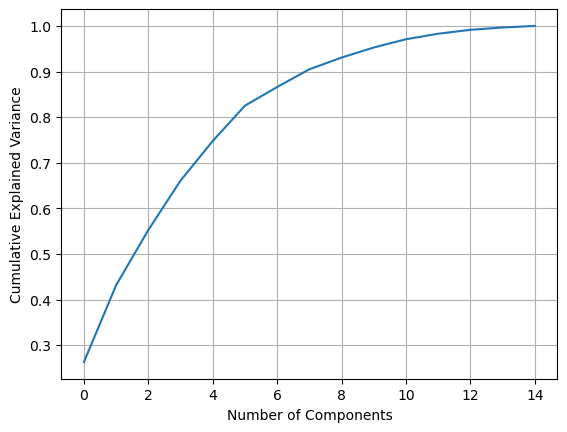

In [25]:
import numpy as np


# Plot untuk lihat elbow
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

testing the best pca with brute force method

In [26]:
variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(variance >= 0.95) + 1
n_components_95

np.int64(10)

### Data Splitting

In [27]:
pca = PCA(n_components=n_components_95)
X_pcs = pd.DataFrame(pca.fit_transform(X), columns=[f"PC{i+1}" for i in range(n_components_95)])



In [28]:
# TODO: Split data
X_train, X_test, y_train, y_test = train_test_split(X_pcs, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [29]:
y_train.value_counts()

HeartDisease
1    406
0    328
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [31]:
y_train_balanced.value_counts()

HeartDisease
1    406
0    406
Name: count, dtype: int64

# Modelling

### Logistic Regression

due to we want to minimize someone who got heartDiasease actually got the prediction right.so, we have to get higher recall

In [32]:
# TODO: Sama kayak diatas
lr_model_balanced = LogisticRegression(C=0.01, random_state=42, class_weight="balanced")
lr_model_balanced.fit(X_train , y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42)

In [33]:
lr_model = LogisticRegression(random_state=42, )
lr_model.fit(X_train , y_train)

LogisticRegression(random_state=42)

In [34]:
y_pred = lr_model_balanced.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Recall", recall_score(y_val, y_pred))

Accuracy score 0.8695652173913043
F1 score 0.8775510204081632
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.91      0.84      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92

Recall 0.8431372549019608


In [35]:
y_pred = lr_model.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Recall", recall_score(y_val, y_pred))

Accuracy score 0.9021739130434783
F1 score 0.9108910891089109
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.92      0.90      0.91        51

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92

Recall 0.9019607843137255


In [36]:
y_pred = lr_model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       328
           1       0.87      0.89      0.88       406

    accuracy                           0.87       734
   macro avg       0.87      0.86      0.86       734
weighted avg       0.87      0.87      0.87       734



this model is very good, but we need to try other

### RandomForest

In [37]:
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [38]:
rf_model_balanced = RandomForestClassifier(random_state=2, class_weight="balanced")
rf_model_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [39]:
y_pred = rf_model.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8695652173913043
F1 score 0.88
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



In [40]:
y_pred = rf_model_balanced.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8695652173913043
F1 score 0.8775510204081632
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.91      0.84      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



In [41]:
y_pred = rf_model_balanced.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



random forest is overfitting

### Simple ANN

In [42]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2),
                    solver='lbfgs',
                    alpha=1e-5,
                    random_state=1,
                    max_iter=1000)

clf.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')

In [43]:
clf_balanced = MLPClassifier(hidden_layer_sizes=(5, 2),
                    solver='lbfgs',
                    alpha=1e-5,
                    random_state=1,
                    max_iter=1000,)

clf_balanced.fit(X_train_balanced, y_train_balanced)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')

In [44]:
y_pred = clf.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8043478260869565
F1 score 0.82
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.84      0.80      0.82        51

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



In [45]:
y_pred = clf_balanced.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8369565217391305
F1 score 0.8543689320388349
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.85      0.86      0.85        51

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



In [46]:
y_pred = clf_balanced.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       328
           1       0.90      0.90      0.90       406

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734



### Cross validation

In [47]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold

models = [clf_balanced, lr_model, rf_model]
model_names = ["BalancedClassifier", "LogisticRegression", "RandomForest"]

results = []
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in zip(model_names, models):
    scores = cross_validate(
        model,
        X_full,
        y_full,
        cv=skf,
        scoring=["recall_macro", "f1_macro", "accuracy"],
        return_train_score=True
    )

    results.append({
        "Model": name,
        "Mean Train Recall": scores["train_recall_macro"].mean(),
        "Mean Train F1": scores["train_f1_macro"].mean(),
        "Mean Train Acc": scores["train_accuracy"].mean(),
        "Mean Val Recall": scores["test_recall_macro"].mean(),
        "Mean Val F1": scores["test_f1_macro"].mean(),
        "Mean Val Acc": scores["test_accuracy"].mean()
    })

# buat DataFrame
df_results = pd.DataFrame(results)
print(df_results)


                Model  Mean Train Recall  Mean Train F1  Mean Train Acc  \
0  BalancedClassifier           0.896558       0.898150        0.899785   
1  LogisticRegression           0.867845       0.868467        0.870192   
2        RandomForest           1.000000       1.000000        1.000000   

   Mean Val Recall  Mean Val F1  Mean Val Acc  
0         0.830627     0.832122      0.835381  
1         0.861836     0.862435      0.864428  
2         0.843799     0.845826      0.848780  


after look at the results, we're going to choose logistic regression, due to highest score and less overfit

### GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["liblinear", "saga"],
    "class_weight": [None, "balanced"],
    "l1_ratio": [0, 0.5, 1],
    "fit_intercept": [True, False],
    "multi_class": ["ovr", "multinomial"]
}
scoring = {
    "f1": "f1_macro",
    "recall": "recall_macro",
    "accuracy": "accuracy"
}

grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=8,
    scoring=scoring,
    refit="recall",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_full, y_full)

print("Best parameters:", grid.best_params_)
print("Best F1 Macro score:", grid.best_score_)

best_index = grid.best_index_
print("Recall Macro for best params:", grid.cv_results_["mean_test_recall"][best_index])
print("Accuracy for best params:", grid.cv_results_["mean_test_accuracy"][best_index])


Fitting 8 folds for each of 576 candidates, totalling 4608 fits
Best parameters: {'C': 10, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Macro score: 0.8646893833318503
Recall Macro for best params: 0.8646893833318503
Accuracy for best params: 0.866761575802838


c:\Users\rasyi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1536 fits failed out of a total of 4608.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
768 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rasyi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rasyi\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\rasyi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solve

In [49]:
best_model = grid.best_estimator_
best_model

LogisticRegression(C=10, l1_ratio=0, max_iter=1000, multi_class='ovr',
                   penalty='l1', random_state=42, solver='liblinear')

In [50]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("accuracy" , accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.83      0.96      0.89        51

    accuracy                           0.87        92
   macro avg       0.88      0.86      0.86        92
weighted avg       0.88      0.87      0.87        92

accuracy 0.8695652173913043


This is our best model. As we can see, the recall is nearly perfect, meaning that the model can correctly identify approximately 96% of patients with heart disease. This is particularly important because we want to minimize the chances of missing any sick patient. While some false positives may occur, they are less critical since further medical evaluation can confirm the diagnosis. Overall, prioritizing recall ensures that nearly all actual cases are detected, which is crucial in a healthcare context.